## **create a model with titanic dataset:-**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df1=sns.load_dataset("titanic")
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **Handling Missing Value:-**

<Axes: >

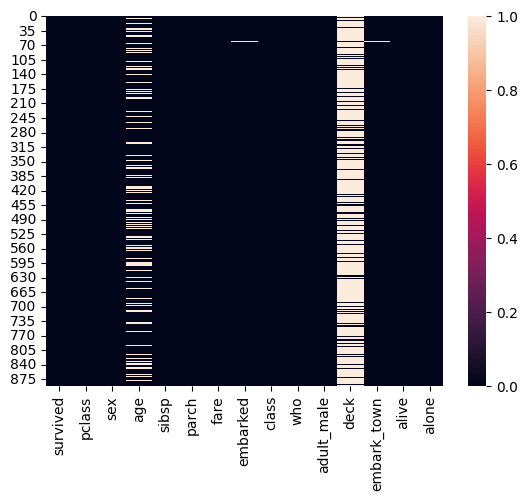

In [39]:
sns.heatmap(df1.isnull())

<Axes: >

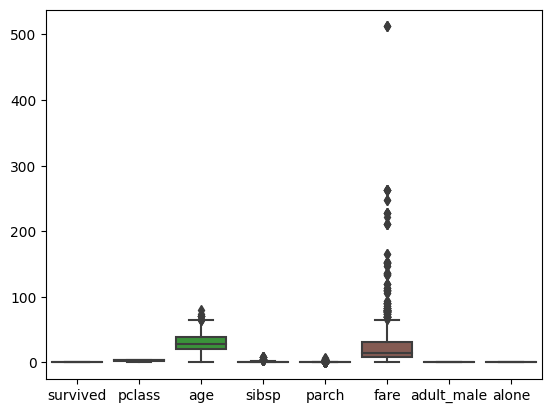

In [40]:
sns.boxplot(df1)

#### **Here we find outlier in our dataset :-**

In [41]:
median=df1["age"].median()
df1["age_median"]=df1["age"].fillna(median)
median=df1["fare"].median()
df1["fare_median"]=df1["fare"].fillna(median)
mode=df1[df1["embarked"].notna()]["embarked"].mode()[0]
df1["mode_embarked"]=df1["embarked"].fillna(mode)
mode=df1[df1["embark_town"].notna()]["embark_town"].mode()[0]
df1["mode_embark_town"]=df1["embark_town"].fillna(mode)
mode=df1[df1["deck"].notna()]["deck"].mode()[0]
df1["mode_deck"]=df1["deck"].fillna(mode)

In [42]:
df1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_median,fare_median,mode_embarked,mode_embark_town,mode_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.0,7.2500,S,Southampton,C
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.0,71.2833,C,Cherbourg,C
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.0,7.9250,S,Southampton,C
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.0,53.1000,S,Southampton,C
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.0,8.0500,S,Southampton,C


In [43]:
df=df1.drop(["age","fare","embarked","embark_town","deck"],axis=1)

<Axes: >

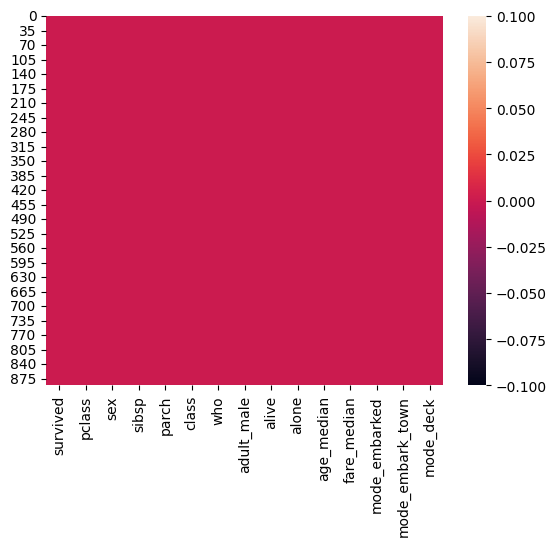

In [44]:
sns.heatmap(df.isnull())

In [45]:
df.head()

,survived,pclass,sex,sibsp,parch,class,who,adult_male,alive,alone,age_median,fare_median,mode_embarked,mode_embark_town,mode_deck
0,0,3,male,1,0,Third,man,True,no,False,22.0,7.2500,S,Southampton,C
1,1,1,female,1,0,First,woman,False,yes,False,38.0,71.2833,C,Cherbourg,C
2,1,3,female,0,0,Third,woman,False,yes,True,26.0,7.9250,S,Southampton,C
3,1,1,female,1,0,First,woman,False,yes,False,35.0,53.1000,S,Southampton,C
4,0,3,male,0,0,Third,man,True,no,True,35.0,8.0500,S,Southampton,C


## **Encoding technique:-**

In [46]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["encoder_sex"]=encoder.fit_transform(df[["sex"]])
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoder_class=encoder.fit_transform(df[["class"]])
df["encoder_class"]=encoder_class
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_employment = encoder.fit_transform(df[["who"]])
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_employment, columns=encoder.get_feature_names_out(["who"]))
pd.concat([df,encoded_df],axis=1)
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["encoded_adult_male"]=encoder.fit_transform(df[["adult_male"]])
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["encoded_embark_town"]=encoder.fit_transform(df[["mode_embark_town"]])
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["encoded_alive"]=encoder.fit_transform(df[["alive"]]) 
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
df["encoded_alone"]=encoder.fit_transform(df[["alone"]])
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["encoded_embarked"]=encoder.fit_transform(df[["mode_embarked"]])
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
encoded=encoder.fit_transform(df[["mode_deck"]])
columns1=list(encoder.get_feature_names_out(["mode_deck"]))
new_df= pd.DataFrame(encoded,columns=columns1)
encoded_df=pd.concat([df,new_df],axis=1)
data=encoded_df.drop(["sex","who","class","adult_male","mode_embark_town","alive","alone","mode_embarked","mode_deck"],axis=1)


C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhi\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was rename

In [47]:
data.head()

,survived,pclass,sibsp,parch,age_median,fare_median,encoder_sex,encoder_class,encoded_adult_male,encoded_embark_town,encoded_alive,encoded_alone,encoded_embarked,mode_deck_A,mode_deck_B,mode_deck_C,mode_deck_D,mode_deck_E,mode_deck_F,mode_deck_G
0,0,3,1,0,22.0,7.2500,1,2.0,1,2,0,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,0,38.0,71.2833,0,0.0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,0,0,26.0,7.9250,0,2.0,0,2,1,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,1,0,35.0,53.1000,0,0.0,0,2,1,0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,0,0,35.0,8.0500,1,2.0,1,2,0,1,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
x=data[["pclass","sibsp","parch","age_median","fare_median","encoder_sex","encoder_class","encoded_adult_male","encoded_embark_town","encoded_alive","encoded_alone","encoded_embarked","mode_deck_A","mode_deck_B","mode_deck_C","mode_deck_D","mode_deck_E","mode_deck_F","mode_deck_G"]]
y=data["survived"]

### split dataset for train test split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
k=3
classifier = KNeighborsRegressor(n_neighbors=k,algorithm="auto")
classifier.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [51]:
y_pred=classifier.predict(x_test)

In [52]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [53]:
print("R2 Score:",r2_score(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

R2 Score: 0.30035133948177417
Mean Absolute Error: 0.266294227188082
Mean Squared Error: 0.16573556797020486


In [54]:
x_test.columns

Index(['pclass', 'sibsp', 'parch', 'age_median', 'fare_median', 'encoder_sex',
       'encoder_class', 'encoded_adult_male', 'encoded_embark_town',
       'encoded_alive', 'encoded_alone', 'encoded_embarked', 'mode_deck_A',
       'mode_deck_B', 'mode_deck_C', 'mode_deck_D', 'mode_deck_E',
       'mode_deck_F', 'mode_deck_G'],
      dtype='object')